In [61]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random


In [62]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [63]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.193278,0.519345,1.665302,-1.151022,-1.551316,1
1,0.256712,0.759529,0.703589,-0.104041,3.998473,0
2,2.155355,-1.649925,1.461851,-1.364145,-0.153890,0
3,2.893017,2.306642,0.251846,-0.399319,2.392913,1
4,0.428451,-2.694006,0.019905,-0.027896,1.630898,1


In [64]:
# function for row sampling
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)


In [87]:
# function for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent*df.shape[1]-1))
    return df[cols]

In [66]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [67]:
df1 = sample_rows(df, 0.2)
df2 = sample_rows(df, 0.2)
df3 = sample_rows(df, 0.2)


In [68]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [77]:
clf1.fit(df1.iloc[:,0:5], df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5], df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5], df3.iloc[:,-1])

DecisionTreeClassifier()

In [78]:
from sklearn.tree import plot_tree

[Text(0.4, 0.875, 'X[1] <= -0.209\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6, 0.625, 'X[4] <= 2.869\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.4, 0.375, 'X[2] <= 1.809\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

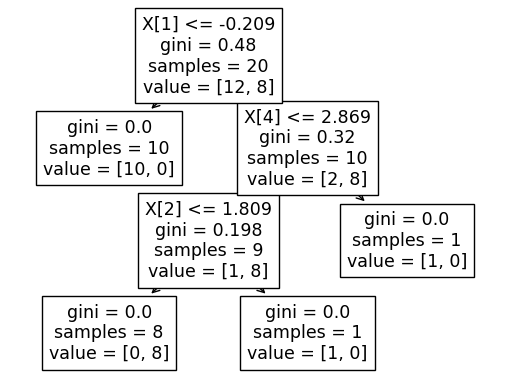

In [79]:
plot_tree(clf1)

[Text(0.6666666666666666, 0.875, 'X[1] <= 0.681\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.5, 0.625, 'X[0] <= 2.201\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.3333333333333333, 0.375, 'X[1] <= -1.781\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

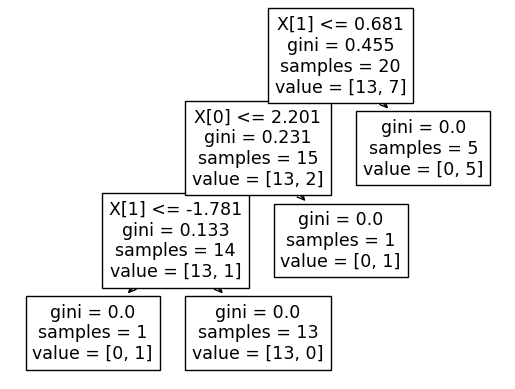

In [80]:
plot_tree(clf2)

[Text(0.5, 0.75, 'X[1] <= -0.203\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

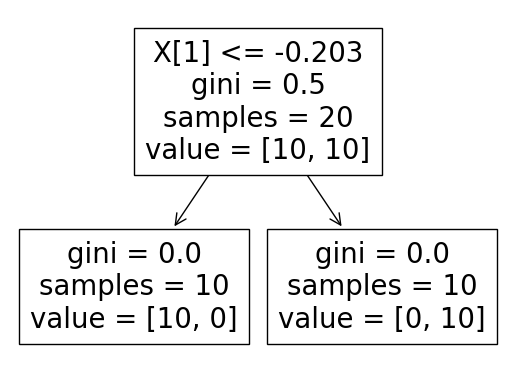

In [81]:
plot_tree(clf3)

In [83]:
clf1.predict(np.array([1.386557,-0.928378,3.190420,-1.804564,-1.207519]).reshape(1,5))

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [84]:
clf2.predict(np.array([1.386557,-0.928378,3.190420,-1.804564,-1.207519]).reshape(1,5))

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [85]:
clf3.predict(np.array([1.386557,-0.928378,3.190420,-1.804564,-1.207519]).reshape(1,5))

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [90]:
sample_features(df, 0.8)

,col2,col5,col3
0,0.519345,-1.551316,1.665302
1,0.759529,3.998473,0.703589
2,-1.649925,-0.153890,1.461851
3,2.306642,2.392913,0.251846
4,-2.694006,1.630898,0.019905
...,...,...,...
95,-0.164295,0.989585,1.384287
96,-1.799891,2.390144,-1.545833
97,-0.241084,1.393753,3.348812
98,-1.523331,2.286864,-0.764378


In [91]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [92]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [93]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.709373,2.423774,2.527389,-1.524586,-2.813162,1
1,2.066957,2.056653,2.192745,-0.147258,1.746587,0
2,-1.766611,-0.455897,0.643251,-1.430039,-0.315606,1
3,0.653069,1.725956,1.550186,-0.701711,-1.227275,1
4,1.105286,1.573325,-2.978985,1.671161,-1.721486,0


In [94]:
# function for row sampling

def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [95]:
# function for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [96]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [97]:
df1 = combined_sampling(df,0.5,0.5)


C:\Users\Dell\AppData\Local\Temp\ipykernel_11164\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [98]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11164\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [99]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11164\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [100]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col3', 'target'], dtype='object')
Index(['col4', 'col3', 'target'], dtype='object')
Index(['col3', 'col2', 'target'], dtype='object')


In [101]:

df3

,col3,col2,target
53,0.507597,-1.778885,1
47,-0.248968,0.220984,0
75,1.789277,3.034601,1
2,0.643251,-0.455897,1
47,-0.248968,0.220984,0
38,1.739929,0.492167,1
29,-0.148208,-0.679533,1
77,-3.365277,-0.315145,0
89,1.600258,0.913405,1
21,1.149971,0.578367,1


In [102]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


In [103]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [104]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'X[1] <= -0.094\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.25, 0.7, 'X[0] <= -1.615\ngini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.75, 0.7, 'X[0] <= 1.938\ngini = 0.191\nsamples = 28\nvalue = [3, 25]'),
 Text(0.625, 0.5, 'X[0] <= 1.207\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.75, 0.3, 'X[0] <= 1.36\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

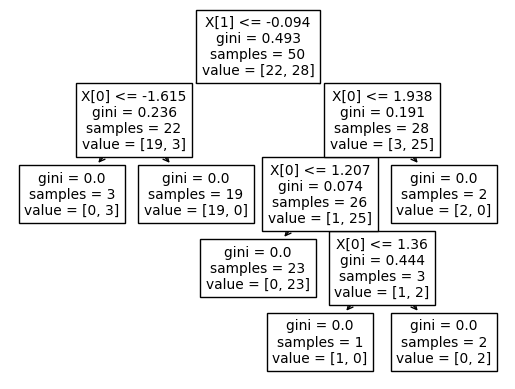

In [105]:
plot_tree(clf1)

[Text(0.36363636363636365, 0.9166666666666666, 'X[1] <= -0.609\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(0.2727272727272727, 0.75, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.45454545454545453, 0.75, 'X[0] <= -0.335\ngini = 0.457\nsamples = 34\nvalue = [12, 22]'),
 Text(0.2727272727272727, 0.5833333333333334, 'X[1] <= -0.269\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.18181818181818182, 0.4166666666666667, 'X[1] <= -0.487\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2727272727272727, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.6363636363636364, 0.5833333333333334, 'X[1] <= -0.301\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(0.5454545454545454, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7272727272727273, 0.4166666666666667, 'X[

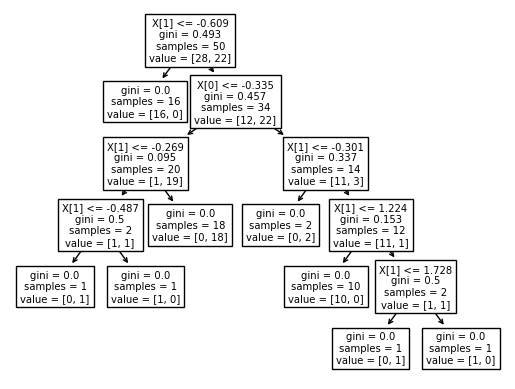

In [106]:
plot_tree(clf2)

[Text(0.5, 0.875, 'X[0] <= 0.457\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.25, 0.625, 'X[1] <= -0.568\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.75, 0.625, 'X[1] <= 0.263\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.625, 0.375, 'X[1] <= -0.15\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]')]

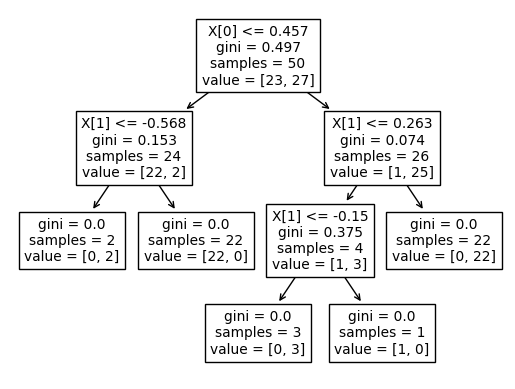

In [107]:
plot_tree(clf3)

In [108]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [109]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [110]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [111]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
38,-1.690574,0.492167,1.739929,-0.730979,-3.338709,1
27,0.642863,1.766044,2.221267,-2.532391,-1.945488,1
38,-1.690574,0.492167,1.739929,-0.730979,-3.338709,1
61,1.454613,2.469135,0.368026,1.283714,-0.975243,0
13,1.191674,2.613758,-1.850731,0.334509,-1.137592,0
66,-0.175216,2.022592,-5.047053,-0.315718,-0.649118,0
35,0.947528,1.549944,-1.591282,0.619542,-1.047683,0
79,2.245499,2.033013,0.187119,2.504843,-2.431630,0
20,0.029031,2.214697,-0.685674,-0.378154,-0.736241,0
68,0.745369,2.631304,0.302428,-1.891455,1.444516,0
